In [44]:
import numpy as np 
import pandas as pd #
import matplotlib.pyplot as plt
from PIL import Image 
import seaborn as sns

In [45]:
df_can=pd.read_excel("https://bit.ly/32HXvZB", sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
print('Data downloaded and read into a dataframe!')

df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.columns = list(map(str, df_can.columns))

df_can.set_index('Country', inplace=True)

df_can['Total'] = df_can.sum(axis=1)

years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)


Data downloaded and read into a dataframe!
data dimensions: (195, 38)


C:\Users\admin\AppData\Local\Temp\ipykernel_14796\320015902.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


# 1) Regression Plot

In [46]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(float, df_tot.index)
df_tot.reset_index(inplace=True)

df_tot.columns = ['year', 'total']

df_tot.head()


,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


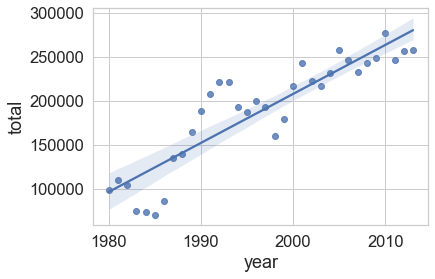

In [47]:
ax = sns.regplot(x='year', y='total', data=df_tot)

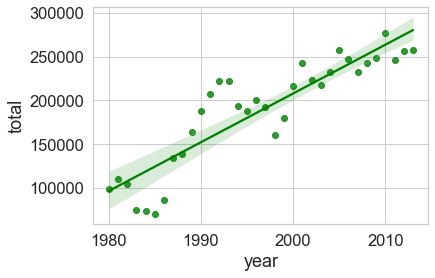

In [48]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

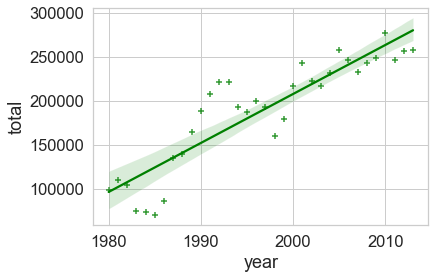

In [49]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green',marker='+')

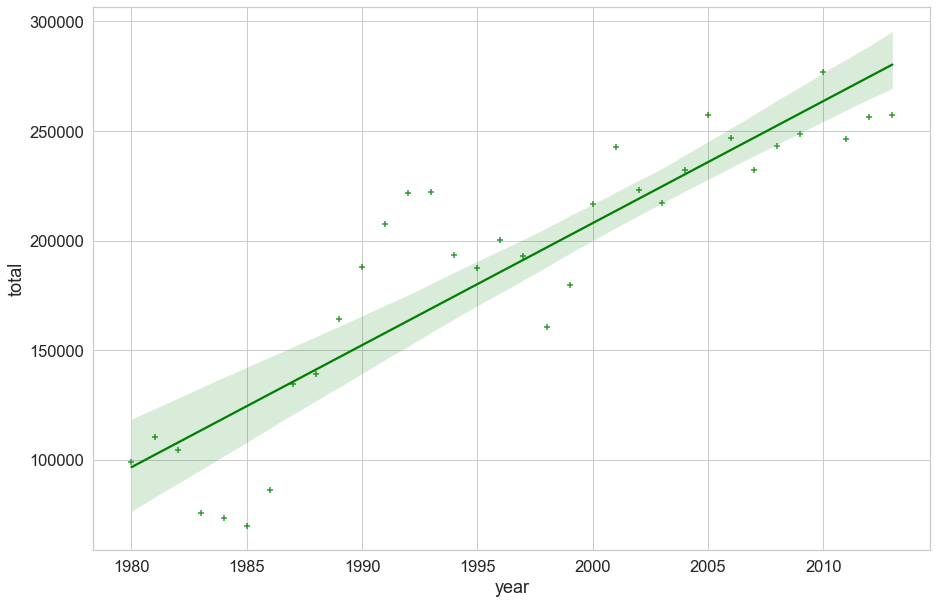

In [50]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

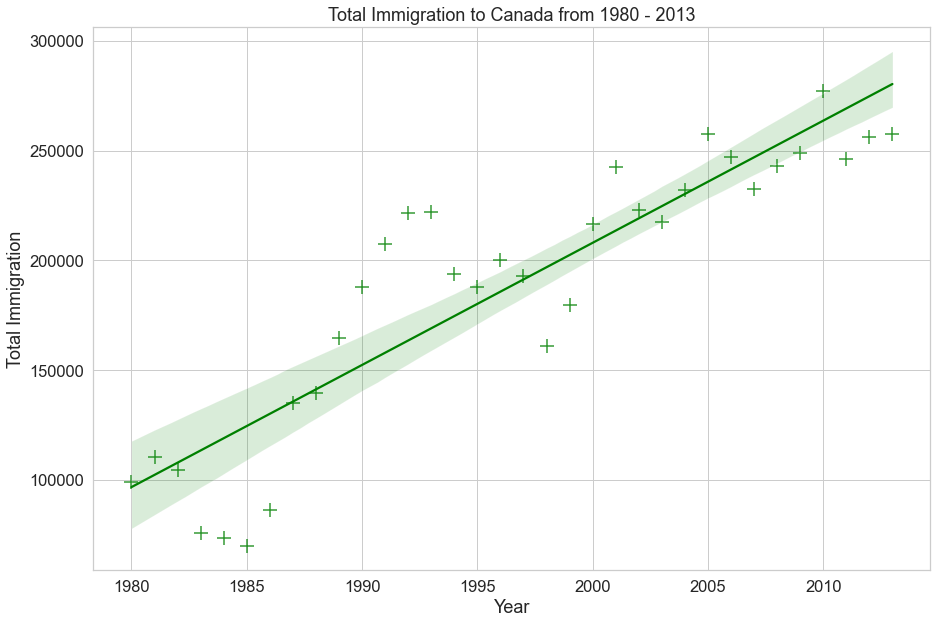

In [51]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green',marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration') 
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

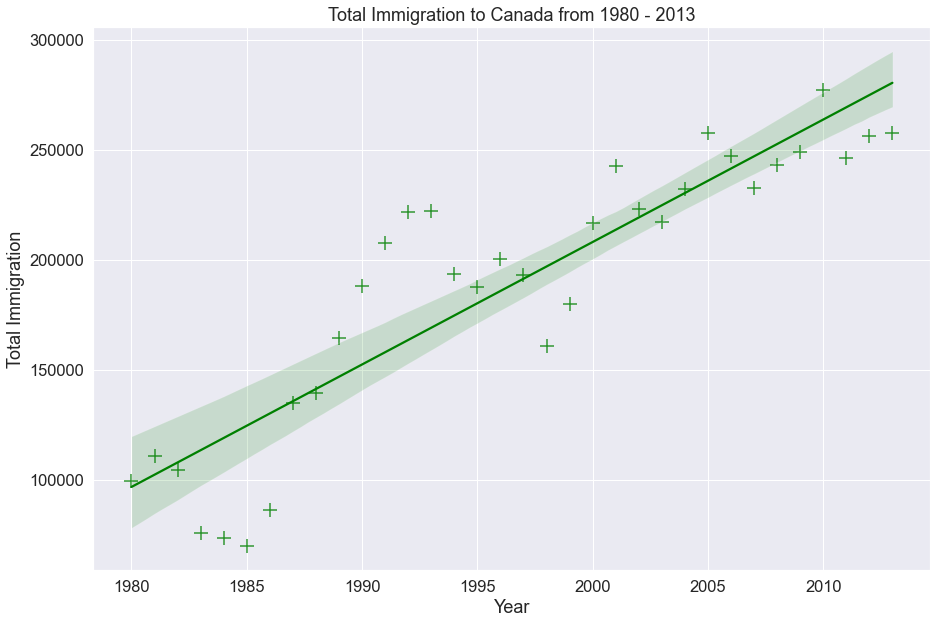

In [52]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

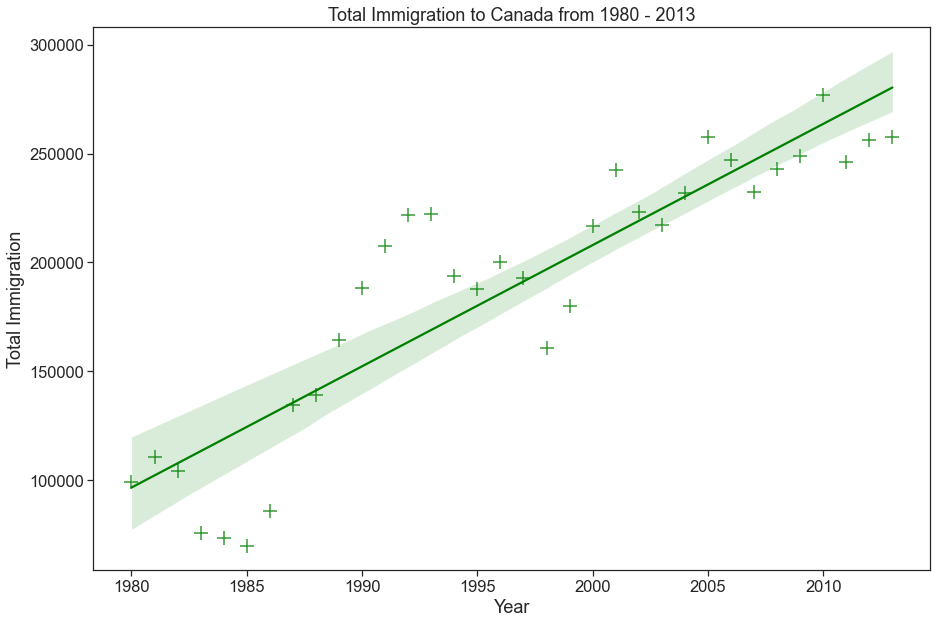

In [53]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('ticks') 
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')


# Question:
Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.

Text(0.5, 1.0, 'Total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013')

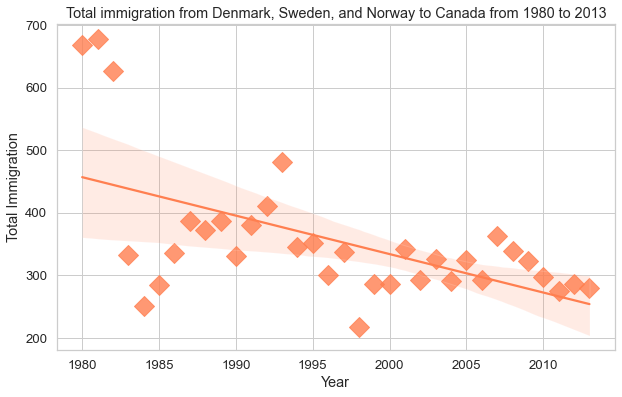

In [66]:
df_countries = df_can.loc[['Denmark','Norway','Sweden'],years].transpose()

df_total = pd.DataFrame(df_countries.sum(axis=1))

df_total.reset_index(inplace=True)

df_total.columns = ['year', 'total']

df_total['year'] = df_total['year'].astype(int)

plt.figure(figsize=(10,6))

sns.set(font_scale=1.2)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_total, color='coral', marker = 'D',scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013')

# 2) Word Clouds

In [55]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [56]:
from wordcloud import WordCloud, STOPWORDS
print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [57]:
alice_novel = open('alice_novel.txt', 'r').read()
print ('File downloaded and saved!')

File downloaded and saved!


In [58]:
stopwords = set(STOPWORDS)

text = " ".join(str(each) for each in df_can.Region)
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(text)

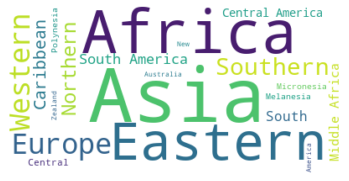

In [59]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

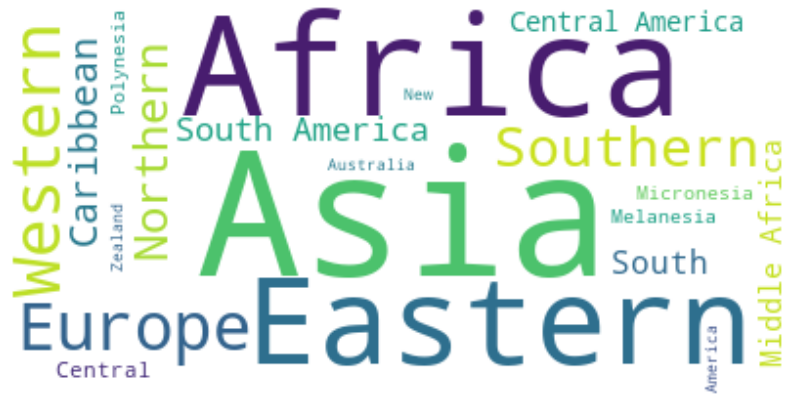

In [60]:
fig = plt.figure()
fig.set_figwidth(14) 
fig.set_figheight(18) 

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

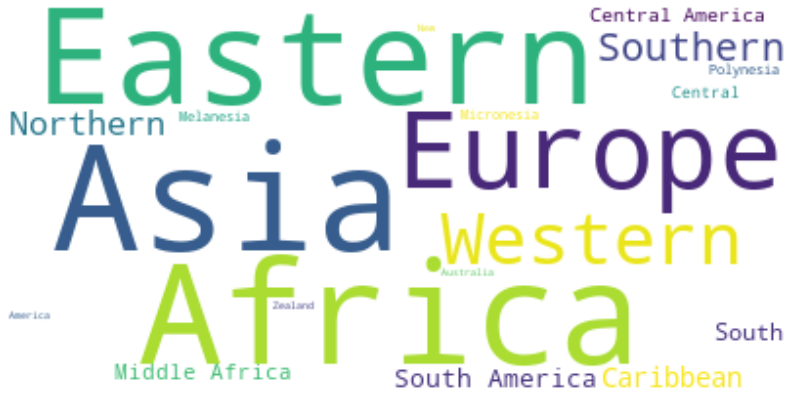

In [61]:
stopwords.add('said')

alice_wc.generate(text)

fig = plt.figure()
fig.set_figwidth(14) 
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [62]:
total_immigration = df_can['Total'].sum()
total_immigration

max_words = 90
word_string = ''
for country in df_can.index.values:
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country,'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

Word cloud created!


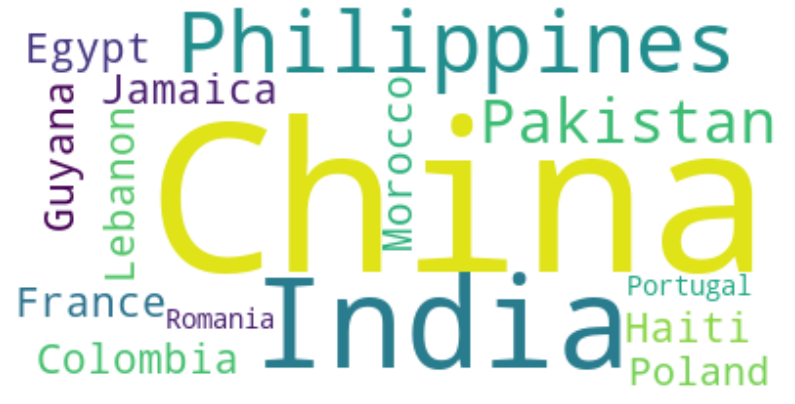

In [63]:
wordcloud = WordCloud(background_color='white').generate(word_string)
print('Word cloud created!')
      
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()